> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [43]:
from dataclasses import dataclass, field
from enum import Enum


#CLASSES
class BiteLevel(Enum):
    Beginner = 'Beginner'
    Intermediate = 'Intermediate'
    Advanced = 'Advanced'

@dataclass(order=True)
class Bite:
    number: int
    title: str = field(compare=False)
    level: BiteLevel = field(default=BiteLevel.Beginner.value, compare=False)
    
    def __str__(self,):
        return f'{self.number} - {self.title} ({self.level})'
        
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))


bites.sort()
for b in bites: print(b)


1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [327]:
from enum import Enum
from typing import Any

from uuid import UUID, uuid4
from datetime import date, time

from pydantic import (BaseModel, EmailStr, Field, field_validator, model_validator, ValidationError) 

In [355]:
### CLASSE
class TemperatureInfo(BaseModel):
    date: date
    temperature: float
    isCelsius: bool = False
    airQualityIndex: int
    sunriseTime: time = "01:20" 
    sunsetTime: time = "00:10"
    
    #!Os campos defaults são uma estimativa padrão para valores com base naqueles fornecidos!
    
    def __str__(self,):
        return f'A temperatura média na data {self.date} foi {self.temperature} (Celsius = {self.isCelsius})'
    
    @field_validator("airQualityIndex") #faz a validação para os atributos desse campo
    @classmethod #verifica dentro da classe
    def transform_air(cls, airQualityIndex) -> date: #transforma str em int
        if isinstance(airQualityIndex,str):
            airQualityIndex = float(airQualityIndex)
        return airQualityIndex
    
    @field_validator("isCelsius")
    @classmethod
    def validate_is_celsius(cls, isCelsius):
        if isinstance(isCelsius, str):
            isCelsius = isCelsius.lower()
            if isCelsius in ("true", "yes", "1"):
                return True
            else:
                return False
        return bool(isCelsius)
    
    @field_validator("temperature") 
    @classmethod 
    def transform_temp(cls, temperature) -> float: 
        if isinstance(temperature,str):
            temperature = float(temperature)
        return temperature



In [358]:
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

for data in data_samples:
    print(TemperatureInfo.model_validate(data))

A temperatura média na data 2023-05-20 foi 62.2 (Celsius = False)
A temperatura média na data 2023-05-21 foi 64.4 (Celsius = True)
A temperatura média na data 2023-05-22 foi 14.4 (Celsius = False)


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [ ]:
import requests, json
from pydantic import BaseModel
from typing import List
from datetime import date

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

In [15]:
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

In [20]:
dados = OpenMeteo(**response)

#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

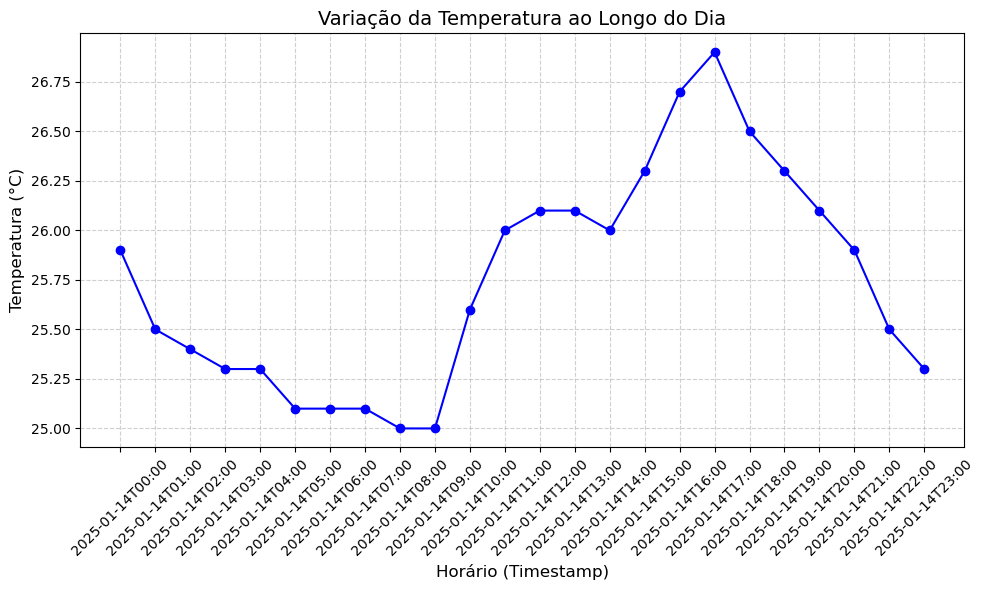

In [30]:
import matplotlib.pyplot as plt

# Extraindo os dados do dicionário
timestamps = dados.hourly.time
temperatures = dados.hourly.temperature_2m

# Fatiando para construir um gráfico legível
time_slice = timestamps[:24]
temperature_slice = temperatures[:24] #variação de temperatura em um dia

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(time_slice, temperature_slice, marker='o', linestyle='-', color='blue')
plt.title("Variação da Temperatura ao Longo do Dia", fontsize=14)
plt.xlabel("Horário (Timestamp)", fontsize=12)
plt.ylabel(f"Temperatura ({response['hourly_units']['temperature_2m']})", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()